<a href="https://colab.research.google.com/github/mcvargasu/Portfolio_Projects/blob/main/PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Overview on the Energy Sector post-Covid-19: Fundamental and Technical Analysis from an Investment Perspective**

As growing investors, we invest in Medium and Large Companies of the following industries with performance equal or higher to the median of the industry. As experts we have high knowledge on last trends and we prefer high volatility portfolios. 
Industries:
Oil & Gas Integrated
Oil & Gas E&P
Oil & Gas Midstream
Oil & Gas Equipment & Services
Oil & Gas Refining & Marketing
Utilities—Renewable
Oil & Gas Drilling



# **Fundamental Analysis**

In [ ]:
# Importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels
!pip install pandas-datareader
from datetime import datetime as dt

In [ ]:
#Connecting to Data Base
sheet='Global us'
file="Export DATA.xlsx"
xl=pd.ExcelFile(file)
btc_xl=xl.parse(sheet, index_col="Ticker")
btc_xl.tail()

,Us Market,Name,Industry,Stock Price,Market Cap,Size,P/E ratio,P/E ratio.1,P/S ratio,P/B ratio,P/Operating CF,EPS (Basic),Book value per Share,Market Cap.1,EV/EBITDA,Debt/Equity,EPS Growth (diluted),Revenue Growth,EBIT Growth,ROE,ROA,Current Ratio,SIMILAR TO AVERAGE,HIGHER THAN AVERAGE
Ticker,,,,,,,,,,,,,,,,,,,,,,,,
HP,NaN,"Helmerich & Payne, Inc.",Oil & Gas Drilling,23.42,2.525098e+09,Medium&Large,0,0,2.4252,1.0147,63.3924,-3.04,26.9722,2955291380,0,0.3694,0.3413,-0.3129,-3.5195,-0.1053,-0.0657,1.8279,NaN,NaN
OAS,NaN,Oasis Petroleum Inc.,Oil & Gas E&P,119.89,2.492034e+09,Medium&Large,2.7618,1.5301,0.6839,0.8088,5.1705,-183.66,45.8000,740866460,0,0.7838,-446.951,-0.4773,-0.5895,-1.6213,-0.7433,0.7977,NaN,NaN
WLL,NaN,Whiting Petroleum Corporation,Oil & Gas E&P,62.58,2.479545e+09,Medium&Large,18.5148,0,1.3002,0.7748,13.5017,-103.19,32.3421,952250000,5.0326,0.3255,-38.0871,-0.5344,-3.4559,-1.4945,-0.7461,0.5901,NaN,NaN
SHI,NaN,"SINOPEC Shangai Petrochemical Company, Ltd.",Oil & Gas Refining & Marketing,22.51,2.436437e+09,Medium&Large,7.1483,0,0.1559,0.4987,2.9078,0.009,41.2687,2227538040,9.0192,0.1577,-0.6949,-0.3036,-1.6812,0.0214,0.0140,1.1352,NaN,NaN
REGI,NaN,"Renewable Energy Group, Inc.",Oil & Gas Refining & Marketing,44.26,2.257260e+09,Medium&Large,11.6781,23.5282,1.295,2.3526,-400.461,2.76,30.1026,2761980000,12.8063,0.0809,-0.6706,-0.1859,-0.7365,0.1055,0.0739,2.6748,NaN,NaN


In [ ]:
# Cleaning data base and sorting important information
df1 = btc_xl.drop(["Size","SIMILAR TO AVERAGE","HIGHER THAN AVERAGE","Us Market","Name","Stock Price","Industry","Market Cap","P/E ratio.1","Market Cap.1"], axis=1)
df1=df1.fillna(0)
df1

,P/E ratio,P/S ratio,P/B ratio,P/Operating CF,EPS (Basic),Book value per Share,EV/EBITDA,Debt/Equity,EPS Growth (diluted),Revenue Growth,EBIT Growth,ROE,ROA,Current Ratio
Ticker,,,,,,,,,,,,,,
SNP,530.629,19.9669,47.601,430.767,0.04,0.9370,462.262,0.4192,-0.4228,-0.3193,-0.6594,0.0437,0.0183,0.8721
XOM,0,0.9755,1.1205,43.968,-5.25,38.4289,13.7215,0.4193,-2.5625,-0.304,-1.3494,-0.1236,-0.0645,0.7965
CVX,21.8882,1.7043,1.2159,72.1108,-2.96,70.9765,15.6895,0.3339,-2.9221,-0.3537,-2.0666,-0.0399,-0.0232,1.1756
RDS.A,74.0982,0.7492,0.8707,24.9876,-2.9726,40.2967,8.1296,0.6955,-2.4766,-0.4823,-1.4471,-0.1359,-0.0593,1.2264
RDS.B,73.975,0.7166,0.8328,23.8996,-5.56,39.9305,7.9032,0.6955,-2.4256,-0.4797,-1.7582,-0.1272,-0.0555,1.2264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HP,0,2.4252,1.0147,63.3924,-3.04,26.9722,0,0.3694,0.3413,-0.3129,-3.5195,-0.1053,-0.0657,1.8279
OAS,2.7618,0.6839,0.8088,5.1705,-183.66,45.8000,0,0.7838,-446.951,-0.4773,-0.5895,-1.6213,-0.7433,0.7977
WLL,18.5148,1.3002,0.7748,13.5017,-103.19,32.3421,5.0326,0.3255,-38.0871,-0.5344,-3.4559,-1.4945,-0.7461,0.5901


In [ ]:
#Data Cleaning and Computing the median ratios of the industry
df2 = df1.replace('-',0, regex=True)
df2.dtypes
df3=df2.median()
df3
df3_pivot= pd.DataFrame(df3)
df3_pivot=df3_pivot.reset_index()
df3_pivot.columns =['Measure','Value']
df3_pivot

,Measure,Value
0,P/E ratio,15.53075
1,P/S ratio,1.29760
2,P/B ratio,1.18200
3,P/Operating CF,22.68000
4,EPS (Basic),-2.14525
5,Book value per Share,19.92150
6,EV/EBITDA,9.98405
7,Debt/Equity,0.78140
8,EPS Growth (diluted),-1.29740
9,Revenue Growth,-0.29640


In [ ]:
#Pivoting Company's ratios table
df2_pivot=df2.stack().reset_index()
df2_pivot_analysis= pd.DataFrame(df2_pivot)
df2_pivot.columns =['Ticker','Measure','Value']
df2_pivot_analysis.head()

,Ticker,Measure,Value
0,SNP,P/E ratio,530.6286
1,SNP,P/S ratio,19.9669
2,SNP,P/B ratio,47.6010
3,SNP,P/Operating CF,430.7674
4,SNP,EPS (Basic),0.0400


In [ ]:
#Craeting a table that compares company's ratios with industry ratios
new_table=pd.merge(df2_pivot_analysis,df3_pivot,on='Measure')
new_table.columns =['Ticker','Measure','Company Value','Industry Value']
new_table.head()

,Ticker,Measure,Company Value,Industry Value
0,SNP,P/E ratio,530.6286,15.53075
1,XOM,P/E ratio,0.0000,15.53075
2,CVX,P/E ratio,21.8882,15.53075
3,RDS.A,P/E ratio,74.0982,15.53075
4,RDS.B,P/E ratio,73.9750,15.53075


In [ ]:
# Computing the square differences between industry and company ratios
new_table['Delta']=new_table['Company Value']-new_table['Industry Value']
new_table['Delta_Squared']=new_table['Delta']*new_table['Delta']
new_table.head()

,Ticker,Measure,Company Value,Industry Value,Delta,Delta_Squared
0,SNP,P/E ratio,530.6286,15.53075,515.09785,265325.795075
1,XOM,P/E ratio,0.0000,15.53075,-15.53075,241.204196
2,CVX,P/E ratio,21.8882,15.53075,6.35745,40.417171
3,RDS.A,P/E ratio,74.0982,15.53075,58.56745,3430.146200
4,RDS.B,P/E ratio,73.9750,15.53075,58.44425,3415.730358


In [ ]:
#Sum of squared differences
table = pd.pivot_table(new_table, values='Delta_Squared', index=['Ticker'], aggfunc=np.sum)
table

,Delta_Squared
Ticker,
APA,1024.856159
AR,10406.155964
AY,533.671656
BEPC,5663.353720
BKR,12782.420421
...,...
VVV,3376.049078
WHD,3798.385350
WLL,11846.222941


In [ ]:
#Selecting the 8 companies with maximum differences.Those are the ones performing above the median of the industry.
A=table.nlargest(8, 'Delta_Squared')
A

,Delta_Squared
Ticker,
TS,5.706267e+07
CHK,1.212388e+06
SNP,6.392860e+05
OAS,2.327975e+05
REGI,1.792033e+05
MUR,1.266431e+05
VLO,4.976220e+04
VAL,2.993547e+04


# **Portfolio Optimization: Markowitz Theory**

In [ ]:
#Extracting historical market data from the 8 companys selected
from pandas_datareader import data as pdr
from datetime import datetime as dt
startdate=dt(2021,6,1)
enddate=dt(2021,12,19)
tickers=['TS','CHK','SNP','OAS','REGI','MUR','VLO','VAL']
Portfolio_Data=pdr.get_data_stooq(tickers, start=startdate, end=enddate)['Close']
Portfolio_Data.head()

Symbols,TS,CHK,SNP,OAS,REGI,MUR,VLO,VAL
Date,,,,,,,,
2021-12-17,20.24,60.76,46.43,119.89,44.26,25.10,68.69,35.20
2021-12-16,20.41,61.36,47.42,119.67,42.69,26.26,68.75,35.04
2021-12-15,20.36,60.94,46.73,118.38,43.96,26.57,68.24,34.16
2021-12-14,20.30,61.73,46.71,117.86,43.51,26.60,68.19,32.09
2021-12-13,20.06,61.91,46.95,119.83,44.35,27.27,68.22,31.59


In [ ]:
#Computing the returns
Portfolio_Data_Returns = Portfolio_Data.pct_change().apply(lambda x: np.log(1+x))
Portfolio_Data_Returns

Symbols,TS,CHK,SNP,OAS,REGI,MUR,VLO,VAL
Date,,,,,,,,
2021-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-16,0.008364,0.009826,0.021098,-0.001837,-0.036117,0.045179,0.000873,-0.004556
2021-12-15,-0.002453,-0.006868,-0.014658,-0.010838,0.029315,0.011736,-0.007446,-0.025435
2021-12-14,-0.002951,0.012880,-0.000428,-0.004402,-0.010289,0.001128,-0.000733,-0.062511
2021-12-13,-0.011893,0.002912,0.005125,0.016577,0.019122,0.024876,0.000440,-0.015704
...,...,...,...,...,...,...,...,...
2021-06-07,0.002999,0.000544,0.007047,0.003483,0.004658,0.006238,-0.006871,-0.055897
2021-06-04,0.006395,-0.020174,0.009372,-0.010691,-0.030522,0.006282,0.006627,0.103733
2021-06-03,-0.000425,-0.017611,-0.013382,0.002853,0.053492,0.002419,0.000962,-0.063698


In [ ]:
# Displaying the covariance matrix
Portfolio_Data_Returns.cov()

Symbols,TS,CHK,SNP,OAS,REGI,MUR,VLO,VAL
Symbols,,,,,,,,
TS,0.000453,0.000264,0.000176,0.000303,0.000224,0.000592,0.000371,0.000371
CHK,0.000264,0.000657,0.000151,0.000343,0.000270,0.000499,0.000287,0.000322
SNP,0.000176,0.000151,0.000256,0.000175,0.000148,0.000276,0.000213,0.000183
OAS,0.000303,0.000343,0.000175,0.000796,0.000340,0.000732,0.000389,0.000448
REGI,0.000224,0.000270,0.000148,0.000340,0.000991,0.000558,0.000329,0.000250
MUR,0.000592,0.000499,0.000276,0.000732,0.000558,0.001322,0.000690,0.000647
VLO,0.000371,0.000287,0.000213,0.000389,0.000329,0.000690,0.000553,0.000407
VAL,0.000371,0.000322,0.000183,0.000448,0.000250,0.000647,0.000407,0.000980


In [ ]:
#Displaying the correlation matrix
Portfolio_Data_Returns.corr()

Symbols,TS,CHK,SNP,OAS,REGI,MUR,VLO,VAL
Symbols,,,,,,,,
TS,1.000000,0.484111,0.515542,0.505231,0.334153,0.764896,0.741187,0.557022
CHK,0.484111,1.000000,0.368016,0.474987,0.334980,0.535816,0.475611,0.401652
SNP,0.515542,0.368016,1.000000,0.387523,0.294696,0.474711,0.564797,0.364927
OAS,0.505231,0.474987,0.387523,1.000000,0.383168,0.713733,0.585745,0.507848
REGI,0.334153,0.334980,0.294696,0.383168,1.000000,0.487535,0.444813,0.254115
MUR,0.764896,0.535816,0.474711,0.713733,0.487535,1.000000,0.806847,0.568626
VLO,0.741187,0.475611,0.564797,0.585745,0.444813,0.806847,1.000000,0.552766
VAL,0.557022,0.401652,0.364927,0.507848,0.254115,0.568626,0.552766,1.000000


In [ ]:
#Importing further required libraries for portfolio optimization
!pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from matplotlib.ticker import FuncFormatter

     |████████████████████████████████| 61 kB 3.2 MB/s 
     |████████████████████████████████| 2.8 MB 8.9 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
#Assigning random weights for initialize the optimization
weight_portfolio=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
portfolio_return=Portfolio_Data_Returns.dot(weight_portfolio)
portfolio_return.head()

Date
2021-12-17         NaN
2021-12-16    0.005354
2021-12-15   -0.003331
2021-12-14   -0.008413
2021-12-13    0.005182
dtype: float64

In [ ]:
#Annualizing variance matrix
variance_matrix=Portfolio_Data_Returns.cov()*252
variance_matrix

Symbols,TS,CHK,SNP,OAS,REGI,MUR,VLO,VAL
Symbols,,,,,,,,
TS,0.114140,0.066542,0.044249,0.076440,0.056409,0.149135,0.093496,0.093498
CHK,0.066542,0.165527,0.038038,0.086542,0.068098,0.125808,0.072249,0.081188
SNP,0.044249,0.038038,0.064542,0.044089,0.037409,0.069600,0.053575,0.046062
OAS,0.076440,0.086542,0.044089,0.200548,0.085739,0.184461,0.097941,0.112994
REGI,0.056409,0.068098,0.037409,0.085739,0.249667,0.140587,0.082986,0.063084
MUR,0.149135,0.125808,0.069600,0.184461,0.140587,0.333057,0.173859,0.163041
VLO,0.093496,0.072249,0.053575,0.097941,0.082986,0.173859,0.139409,0.102541
VAL,0.093498,0.081188,0.046062,0.112994,0.063084,0.163041,0.102541,0.246843


In [ ]:
#Computing portfolio's variance and volatility 
portfolio_variance=np.transpose(weight_portfolio)@variance_matrix@weight_portfolio
portfolio_variance
portfolio_volatility=np.sqrt(portfolio_variance)
portfolio_volatility
print('The portfolio volatility is '+str(portfolio_volatility))
print('The portfolio variance is '+str(portfolio_variance))

The portfolio volatility is 0.3194979466962603
The portfolio variance is 0.10207893794312638


In [ ]:
#Creating lists to store portfolios metrics in the simulation
port_returns=[]
port_volatility=[]
port_weights=[]
num_portfolios=1000
num_assets=len(Portfolio_Data_Returns.columns)
#Finding individual assets annual return
individual_returns_monthly=Portfolio_Data_Returns.resample('M').last().mean()
individual_returns_annually=individual_returns_monthly*12
individual_returns_annually

Symbols
TS     -0.083882
CHK    -0.043720
SNP    -0.062697
OAS     0.011304
REGI   -0.014673
MUR     0.018444
VLO    -0.013001
VAL     0.001171
dtype: float64

In [ ]:
#Randomly generation of weights and metrics for 1000 different portfolio escenarios.
for port in range(num_portfolios):
  weights=np.random.random(num_assets)
  weights=weights/np.sum(weights)
  port_weights.append(weights)
  returns=np.dot(weights,individual_returns_annually)
  port_returns.append(returns)
  var=variance_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
  sd=np.sqrt(var)
  ann_sd=sd*np.sqrt(250)
  port_volatility.append(ann_sd)

In [ ]:
#Stroraging the results in a data frame
data={'Returns':port_returns,'Volatility':port_volatility}
for i,j in enumerate(Portfolio_Data_Returns.columns.tolist()):
  data[j+' weight']=[w[i]for w in port_weights]
portfolios_V1=pd.DataFrame(data)
portfolios_V1.head()

,Returns,Volatility,TS weight,CHK weight,SNP weight,OAS weight,REGI weight,MUR weight,VLO weight,VAL weight
0,-0.013173,5.150978,0.012061,0.132701,0.067473,0.178876,0.213472,0.043147,0.157161,0.195107
1,-0.018285,5.134147,0.089878,0.020269,0.160154,0.148425,0.132690,0.127381,0.160492,0.160711
2,-0.009440,5.589662,0.056261,0.033390,0.030361,0.139771,0.199379,0.156701,0.236539,0.147598
3,-0.026667,4.842077,0.058859,0.158605,0.228983,0.066492,0.201992,0.131928,0.059212,0.093930
4,-0.012864,5.524236,0.016295,0.266495,0.036063,0.168065,0.023475,0.115217,0.120200,0.254192


Text(0, 0.5, 'Expected Returns')

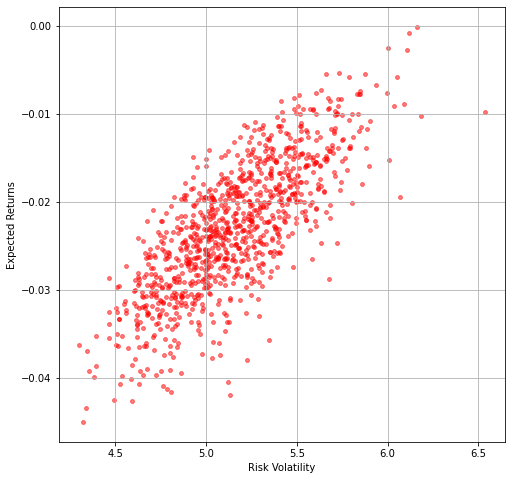

In [ ]:
#Plotting different portfolio alternatives
portfolios_V1.plot.scatter(x='Volatility',y='Returns',marker='o',color='r',s=15,alpha=0.5,grid=True,figsize=[8,8])
plt.xlabel('Risk Volatility')
plt.ylabel('Expected Returns')

In [ ]:
#Computing optimal risky portfolio
rf=0.03
optimal_risky_port=portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]
optimal_risky_port

Returns       -0.000115
Volatility     6.163804
TS weight      0.028049
CHK weight     0.010649
SNP weight     0.065615
OAS weight     0.286677
REGI weight    0.017208
MUR weight     0.242683
VLO weight     0.074496
VAL weight     0.274624
Name: 403, dtype: float64

Text(0, 0.5, 'Expected Returns')

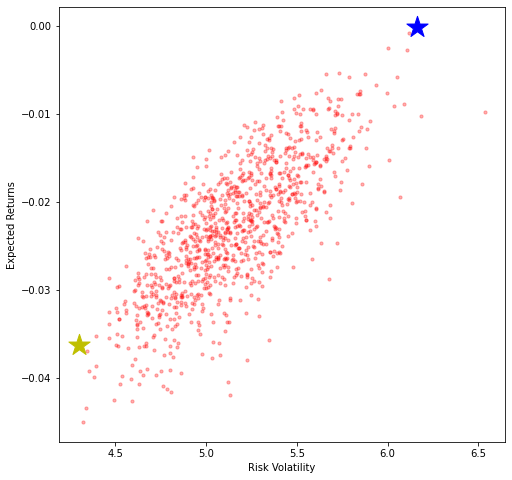

In [ ]:
#Plotting optimal portfolio in blue and minimum volatility portfolio in yellow
min_vol_port=portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
plt.subplots(figsize=(8,8))
plt.scatter(portfolios_V1['Volatility'],portfolios_V1['Returns'],marker='o',s=10,alpha=0.3,color='red')
plt.scatter(min_vol_port[1],min_vol_port[0],color='y',marker='*',s=500)
plt.scatter(optimal_risky_port[1],optimal_risky_port[0],color='b',marker='*',s=500)
plt.xlabel('Risk Volatility')
plt.ylabel('Expected Returns')

# **Technical Analysis: EMA approach**

In [ ]:
#Pivoting Price Data for Visualization Purposes
Portfolio_Data_Flat=Portfolio_Data.stack().reset_index()
Portfolio_Data_Flat.columns=['Date','Ticker','Close']
Portfolio_Data_Flat.head()

,Date,Ticker,Close
0,2021-12-17,TS,20.24
1,2021-12-17,CHK,60.76
2,2021-12-17,SNP,46.43
3,2021-12-17,OAS,119.89
4,2021-12-17,REGI,44.26


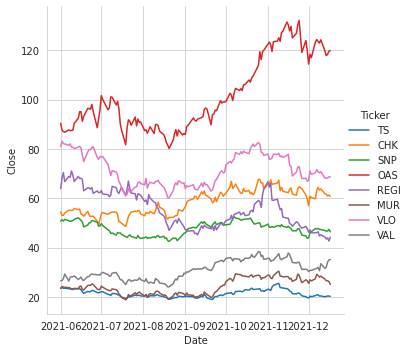

In [ ]:
#Plotting historical price series for the 8 companies composing the portfolio
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
sns.relplot(x="Date", y="Close", hue="Ticker", kind="line", data=Portfolio_Data_Flat)

## **Short Term and Long Term EMA's for each stock**

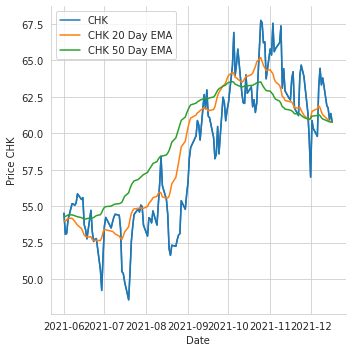

In [ ]:
d = {'Price CHK':Portfolio_Data['CHK']}
dfCHK = pd.DataFrame(data=d)
dfCHK.reset_index()
sns.relplot(x="Date", y="Price CHK", kind="line", data=dfCHK)
exp1 = dfCHK['Price CHK'].ewm(span=20, adjust=False).mean()
exp2 = dfCHK['Price CHK'].ewm(span=50, adjust=False).mean()
plt.plot(dfCHK, label='CHK')
exp1.dtype
plt.plot(exp1, label='CHK 20 Day EMA')
plt.plot(exp2, label='CHK 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

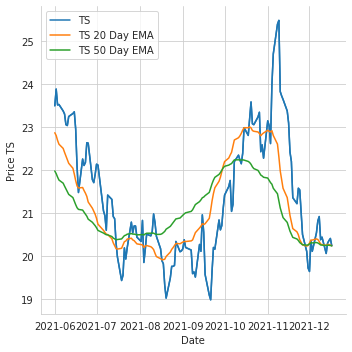

In [ ]:
d12 = {'Price TS':Portfolio_Data['TS']}
dfTS = pd.DataFrame(data=d12)
dfTS.reset_index()
sns.relplot(x="Date", y="Price TS", kind="line", data=dfTS)
exp1 = dfTS['Price TS'].ewm(span=20, adjust=False).mean()
exp2 = dfTS['Price TS'].ewm(span=50, adjust=False).mean()
plt.plot(dfTS, label='TS')
exp1.dtype
plt.plot(exp1, label='TS 20 Day EMA')
plt.plot(exp2, label='TS 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

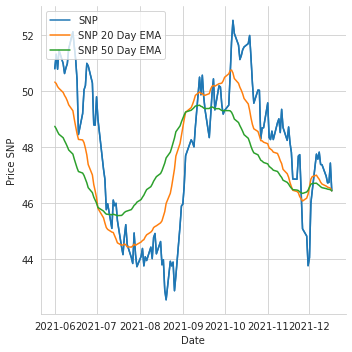

In [ ]:
d13 = {'Price SNP':Portfolio_Data['SNP']}
dfSNP = pd.DataFrame(data=d13)
dfSNP.reset_index()
sns.relplot(x="Date", y="Price SNP", kind="line", data=dfSNP)
exp1 = dfSNP['Price SNP'].ewm(span=20, adjust=False).mean()
exp2 = dfSNP['Price SNP'].ewm(span=50, adjust=False).mean()
plt.plot(dfSNP, label='SNP')
exp1.dtype
plt.plot(exp1, label='SNP 20 Day EMA')
plt.plot(exp2, label='SNP 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

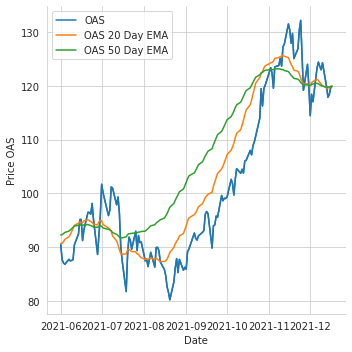

In [ ]:
d14 = {'Price OAS':Portfolio_Data['OAS']}
dfOAS = pd.DataFrame(data=d14)
dfOAS.reset_index()
sns.relplot(x="Date", y="Price OAS", kind="line", data=dfOAS)
exp1 = dfOAS['Price OAS'].ewm(span=20, adjust=False).mean()
exp2 = dfOAS['Price OAS'].ewm(span=50, adjust=False).mean()
plt.plot(dfOAS, label='OAS')
exp1.dtype
plt.plot(exp1, label='OAS 20 Day EMA')
plt.plot(exp2, label='OAS 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

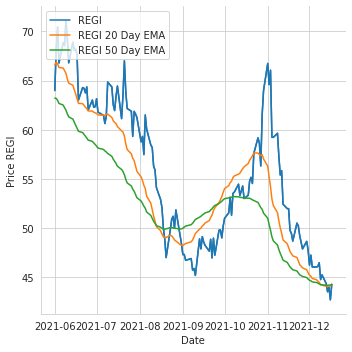

In [ ]:
d15 = {'Price REGI':Portfolio_Data['REGI']}
dfREGI = pd.DataFrame(data=d15)
dfREGI.reset_index()
sns.relplot(x="Date", y="Price REGI", kind="line", data=dfREGI)
exp1 = dfREGI['Price REGI'].ewm(span=20, adjust=False).mean()
exp2 = dfREGI['Price REGI'].ewm(span=50, adjust=False).mean()
plt.plot(dfREGI, label='REGI')
exp1.dtype
plt.plot(exp1, label='REGI 20 Day EMA')
plt.plot(exp2, label='REGI 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

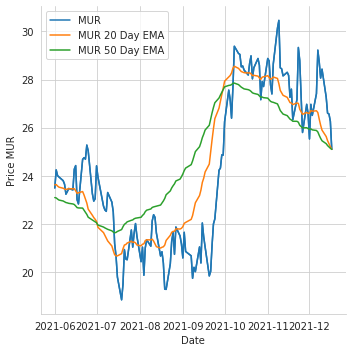

In [ ]:
d16 = {'Price MUR':Portfolio_Data['MUR']}
dfMUR = pd.DataFrame(data=d16)
dfMUR.reset_index()
sns.relplot(x="Date", y="Price MUR", kind="line", data=dfMUR)
exp1 = dfMUR['Price MUR'].ewm(span=20, adjust=False).mean()
exp2 = dfMUR['Price MUR'].ewm(span=50, adjust=False).mean()
plt.plot(dfMUR, label='MUR')
exp1.dtype
plt.plot(exp1, label='MUR 20 Day EMA')
plt.plot(exp2, label='MUR 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

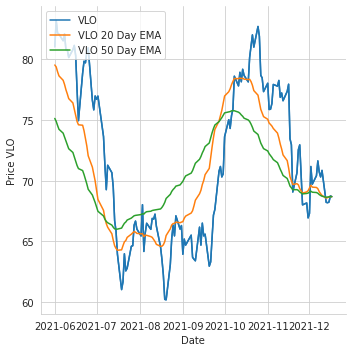

In [ ]:
d17 = {'Price VLO':Portfolio_Data['VLO']}
dfVLO = pd.DataFrame(data=d17)
dfVLO.reset_index()
sns.relplot(x="Date", y="Price VLO", kind="line", data=dfVLO)
exp1 = dfVLO['Price VLO'].ewm(span=20, adjust=False).mean()
exp2 = dfVLO['Price VLO'].ewm(span=50, adjust=False).mean()
plt.plot(dfVLO, label='VLO')
exp1.dtype
plt.plot(exp1, label='VLO 20 Day EMA')
plt.plot(exp2, label='VLO 50 Day EMA')
plt.legend(loc='upper left')
plt.show()

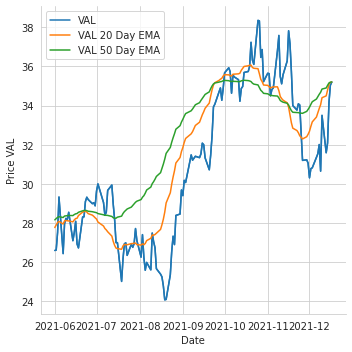

In [ ]:
d18 = {'Price VAL':Portfolio_Data['VAL']}
dfVAL = pd.DataFrame(data=d18)
dfVAL.reset_index()
sns.relplot(x="Date", y="Price VAL", kind="line", data=dfVAL)
exp1 = dfVAL['Price VAL'].ewm(span=20, adjust=False).mean()
exp2 = dfVAL['Price VAL'].ewm(span=50, adjust=False).mean()
plt.plot(dfVAL, label='VAL')
exp1.dtype
plt.plot(exp1, label='VAL 20 Day EMA')
plt.plot(exp2, label='VAL 50 Day EMA')
plt.legend(loc='upper left')
plt.show()